<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#White-Noise-Model" data-toc-modified-id="White-Noise-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>White Noise Model</a></span><ul class="toc-item"><li><span><a href="#Properites" data-toc-modified-id="Properites-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Properites</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example</a></span></li></ul></li><li><span><a href="#Random-Walk-Model" data-toc-modified-id="Random-Walk-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Walk Model</a></span><ul class="toc-item"><li><span><a href="#Properites" data-toc-modified-id="Properites-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Properites</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example</a></span></li><li><span><a href="#Variation:-Random-Walk-w/-a-drift" data-toc-modified-id="Variation:-Random-Walk-w/-a-drift-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Variation: Random Walk w/ a drift</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(13)

# White Noise Model

https://machinelearningmastery.com/white-noise-time-series-python/

Stationary series

## Properties

- Fixed/constant mean
- Fixed/constant variance
- No correlation over time (pattern is random)

Note that *Gaussian white noise* model has mean of 0 and variance of 1

## Example

In [2]:
# Create a date series
n_days = 100
date_series = pd.date_range(start='1/1/2015', periods=n_days)

# Create a normally distributed temperature values for each day
avg_temp = 10
std_temp = 3

temp_series = np.random.normal(avg_temp, std_temp, n_days)

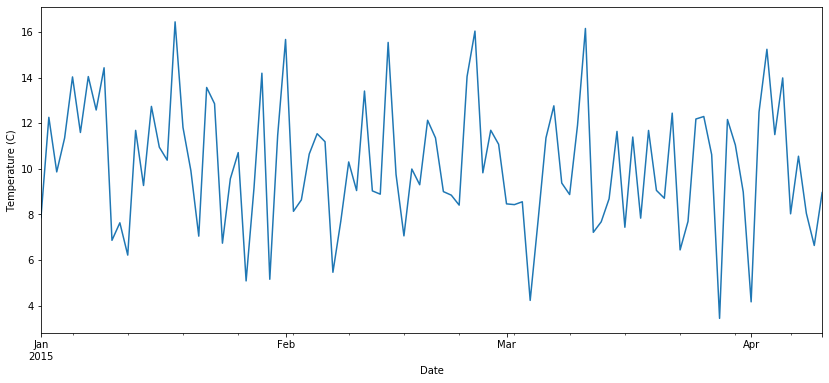

In [3]:
time_series = pd.Series(data=temp_series, index=date_series)


ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Temperature (C)")
ax.set_xlabel("Date")
plt.show()

### Pink Noise: https://www.youtube.com/watch?v=5Yw1mgZigEg

# Random Walk Model

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

## Properites

Previous value will influence the current value

- No specified mean
- No specified variance
- Strong dependence over time

Formula: $Y(t) = Y(t-1) + \epsilon(t)$

$\epsilon(t)$ is a white noise model with mean=0

## Example

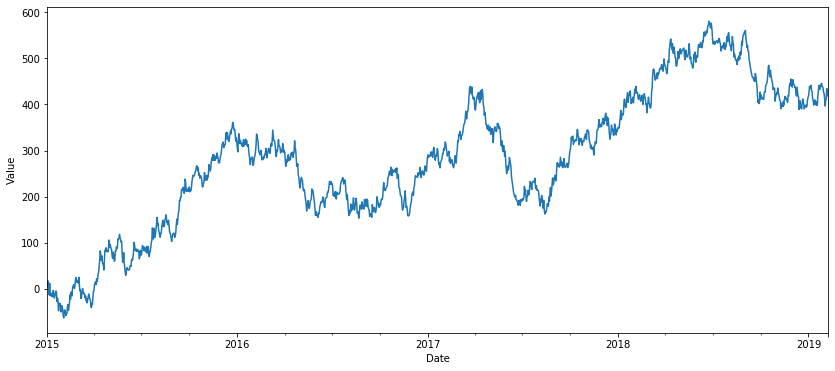

In [9]:
avg = 0
std = 10
n_pts = 1500

# Dates & white noise (epsilon)
date_vals = pd.date_range(start='1/1/2015', periods=n_pts)
epsilon = np.random.normal(avg,std,n_pts)

# Generate data starting at y0 & "walk" based on epsilon (white noise model)
y0 = 0
vals = y0 + np.cumsum(epsilon) 
time_series =  pd.Series(vals, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()

## Variation: Random Walk w/ a drift

"Drifts" with a particular value

Formula: $Y(t) = c + Y(t-1) + \epsilon(t)$

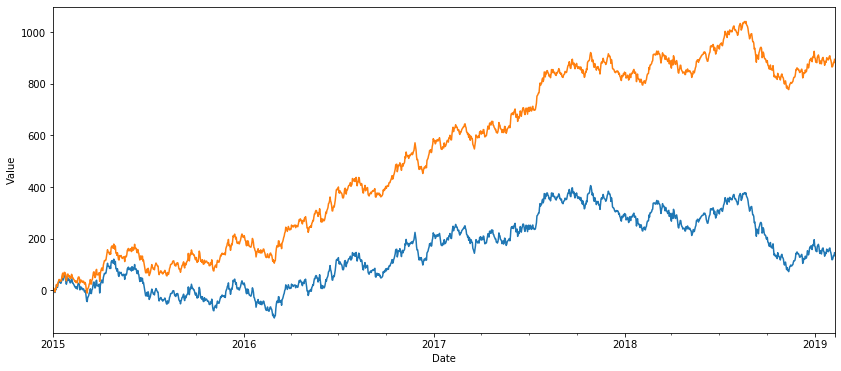

In [6]:
# Same values from above but have a constant "drift" in the epsilon
c = 0.5
vals_drift = y0 + np.cumsum(c + epsilon) 
time_series_drift =  pd.Series(vals_drift, index=date_vals)

# Plot out the model
ax = time_series.plot(figsize=(14,6))
time_series_drift.plot()
ax.set_ylabel("Value")
ax.set_xlabel("Date")
plt.show()